This notebook is for exploratory data analysis (EDA). 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline


In [17]:
#import each dataset from GitHub
url = 'https://raw.githubusercontent.com/jamesdinardo/Retail-Forecasting/master/features_data.csv'
features = pd.read_csv(url)
print('Shape of features data: {}'.format(features.shape))
features.head()


Shape of features data: (8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [18]:
url = 'https://raw.githubusercontent.com/jamesdinardo/Retail-Forecasting/master/sales_data.csv'
sales = pd.read_csv(url)
print('Shape of sales data: {}'.format(sales.shape))
sales.head()

Shape of sales data: (421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [19]:
url = 'https://raw.githubusercontent.com/jamesdinardo/Retail-Forecasting/master/stores_data.csv'
stores = pd.read_csv(url)
print('Shape of stores data: {}'.format(stores.shape))
stores.head()

Shape of stores data: (45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [20]:
#merge the three dataframes into one
df = pd.merge(features, sales, on=['Store', 'Date', 'IsHoliday'])
df = pd.merge(df, stores, on='Store')
print('Shape of final dataframe: {}'.format(df.shape))
df.head()


Shape of final dataframe: (421570, 16)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315


In [21]:
#get basic info about df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     150681 non-null  float64
 5   MarkDown2     111248 non-null  float64
 6   MarkDown3     137091 non-null  float64
 7   MarkDown4     134967 non-null  float64
 8   MarkDown5     151432 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Dept          421570 non-null  int64  
 13  Weekly_Sales  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [22]:
#move the target column "Weekly_Sales" to the end
columns = list(df.columns.values)
order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 13]
columns = [columns[i] for i in order]
print(columns)

df = df[columns]
df.head()

['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Dept', 'Type', 'Size', 'Weekly_Sales']


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Type,Size,Weekly_Sales
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,A,151315,24924.50
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,A,151315,50605.27
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,A,151315,13740.12
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,A,151315,39954.04
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,A,151315,32229.38


In [23]:
#convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

#convert Store column to category
df['Store'] = df['Store'].astype('category')

df.dtypes

Store                 category
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
Dept                     int64
Type                    object
Size                     int64
Weekly_Sales           float64
dtype: object

In [32]:
#get overall summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000
CPI,421570.0,171.201947,39.159276,126.064,132.022667,182.31878,212.416993,227.232807
Unemployment,421570.0,7.960289,1.863296,3.879,6.891000,7.86600,8.572000,14.313000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000


In [24]:
#get the range of the dates
print('Earliest date: {}'.format(df['Date'].min()))
print('Latest date: {}'.format(df['Date'].max()))

delta = df['Date'].max() - df['Date'].min()
print('Range: {}'.format(delta))

Earliest date: 2010-01-10 00:00:00
Latest date: 2012-12-10 00:00:00
Range: 1065 days 00:00:00


In [25]:
#calculate the total sales and average sales each year
print('Total sales: {}'.format(df['Weekly_Sales'].sum()))
display(df.groupby(df.Date.dt.year).agg({'Weekly_Sales':'sum'}))

Total sales: 6737218987.11


,Weekly_Sales
Date,
2010,2.288886e+09
2011,2.448200e+09
2012,2.000133e+09


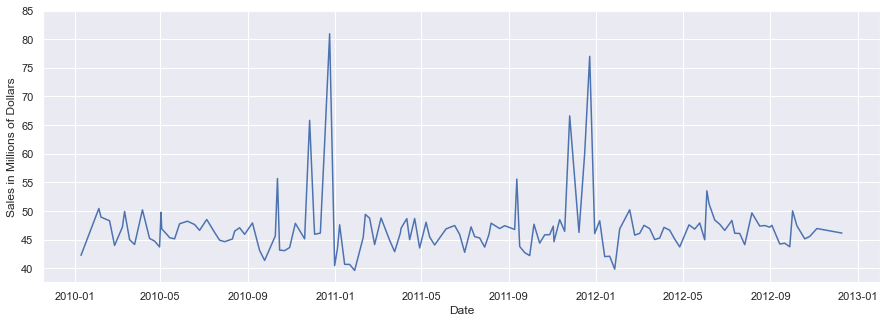

In [50]:
#plot the weekly sales

import matplotlib.dates as mdates

sales_per_week = df.groupby(df.Date).agg({'Weekly_Sales':'sum'})

sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = ax.plot(sales_per_week.index, sales_per_week['Weekly_Sales'] / (10**6))
_ = ax.set_xlabel('Date')
_ = ax.set_ylabel('Sales in Millions of Dollars')
_ = ax.set_yticks(np.arange(40.0, 90.0, 5.0))

In [27]:
#get the number of rows for each store
df['Store'].value_counts().sort_values(ascending=False)

13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: Store, dtype: int64

In [28]:
#get the average weekly sales per store
df.groupby('Store').agg(Average_Weekly_Sales=pd.NamedAgg(column='Weekly_Sales', aggfunc='mean')) \
    .sort_values(by='Average_Weekly_Sales', ascending=False)

,Average_Weekly_Sales
Store,
20,29508.301592
4,29161.210415
14,28784.851727
13,27355.136891
2,26898.070031
10,26332.303819
27,24826.984536
6,21913.243624
1,21710.543621


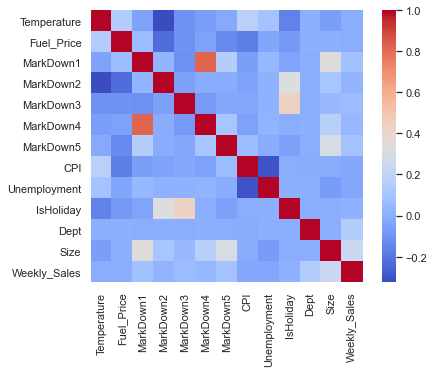

In [77]:
#plot a heatmap of correlations between each variable
fix, ax = plt.subplots(figsize=(7, 5))
_ = sns.heatmap(df.corr(), square=True, cmap='coolwarm', ax=ax)

In [91]:
#check if any variables have a linear correlation to Weekly_Sales
df.corr()['Weekly_Sales'].sort_values(ascending=False)

Weekly_Sales    1.000000
Size            0.243828
Dept            0.148032
MarkDown5       0.090362
MarkDown1       0.085251
MarkDown3       0.060385
MarkDown4       0.045414
MarkDown2       0.024130
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
CPI            -0.020921
Unemployment   -0.025864
Name: Weekly_Sales, dtype: float64